<a href="https://colab.research.google.com/github/MajedeR/mechanical-stress-prediction/blob/main/stress_prediction_6061.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#mount google drive to use dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
#import libraries
import pandas as pd
import numpy as np
import zipfile
import os
import random
from matplotlib import pyplot as plt

In [ ]:
###Uzip data (Just run once)
# zip_path = '/content/drive/MyDrive/stress_prediction_6061/unzipped_folder/Stress-strain data for aluminum 6061-T651 from 9 lots at 6 temperatures under uniaxial and plain strain tension/stress-strain-curves-of-aluminum-6061-t651-from-9-lots-at-6-temperatures-under-uniaxial-and-plain-strain-tension.zip'

# #extract dir
# extract_to = '/content/drive/MyDrive/stress_prediction_6061/Newunzipped_folder'
# os.makedirs(extract_to, exist_ok=True)


# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_to)


In [3]:
#Data folder direction
Data_dir = '/content/drive/MyDrive/stress_prediction_6061/Newunzipped_folder'

In [4]:
#make list for directions
file_names = os.listdir(Data_dir)
csv_paths = [os.path.join(Data_dir,i) for i in file_names]

print(f"Example Name:  {file_names[0]}")
print(f"Example Path:  {csv_paths[0]}")
print(f"Len Data: {len(csv_paths)}")

Example Name:  P_020_G_2_022_195_24.csv
Example Path:  /content/drive/MyDrive/stress_prediction_6061/Newunzipped_folder/P_020_G_2_022_195_24.csv
Len Data: 154


In [5]:
#Read csv files
data = [pd.read_csv(i) for i in csv_paths]

In [6]:
#Show the example data
example = data[0]
#print(example)

        Strain  Stress_MPa
0    -0.000096    0.583252
1    -0.000099    0.591747
2    -0.000103    0.599371
3    -0.000105    0.606555
4    -0.000108    0.613481
...        ...         ...
1000  0.265238  230.688502
1001  0.265863  230.227235
1002  0.266486  229.756038
1003  0.267110  229.273017
1004  0.267111    0.000000

[1005 rows x 2 columns]


#Create DataFrame

In [17]:
dataset = []
for i in range(0, len(csv_paths)):


  datadf = data[i]
  #Data cleaning
  ##Delet incomplete data
  datadf = datadf.dropna()

  #Get features from file names
  datadata = file_names[i].split("_")
  datatype = datadata[0]
  dataTemp = datadata[1]
  dataLot = datadata[2]
  dataNum = datadata[3]



  #Get mechanical properties from df
  datastrains = datadf.iloc[ : , 0]
  datastress = datadf.iloc[ : , 1]

  ##Calculate ultimate stress
  ultimate_stress = datastress.max()

  ##Calculate yield stress
  stress_diff = np.diff(datastress)
  yield_index = np.argmax(stress_diff < 0) if any(stress_diff < 0) else 0
  yield_stress = datastress.iloc[yield_index]

  ##Calculate fracture stress
  fracture_strain = datastrains.iloc[-1]

  #create dictionary for each sample
  datadict = {'sample_type': datatype,
        'temperature': dataTemp,
        'lot': dataLot,
        'sample_id': dataNum,
        'yield_stress': yield_stress,
        'ultimate_stress': ultimate_stress,
        'fracture_strain': fracture_strain
    }

  #Add all samples to a list
  dataset.append(datadict)

In [19]:
#Creat dataframe for dataset
df = pd.DataFrame(dataset)
df

,sample_type,temperature,lot,sample_id,yield_stress,ultimate_stress,fracture_strain
0,P,020,G,2,0.909555,293.457419,0.267111
1,T,250,C,1,141.780139,141.780139,0.104313
2,P,250,F,3,160.431047,160.441808,0.296250
3,P,200,G,3,216.451944,216.451944,0.249928
4,P,250,G,2,139.706362,139.706362,0.248813
...,...,...,...,...,...,...,...
149,T,300,D,3,0.803703,90.107454,0.187269
150,P,200,H,3,231.533682,231.533682,0.204158
151,P,150,I,3,246.823787,246.823787,0.317925
152,P,300,H,1,100.218255,101.923633,0.430850


#Data analysis

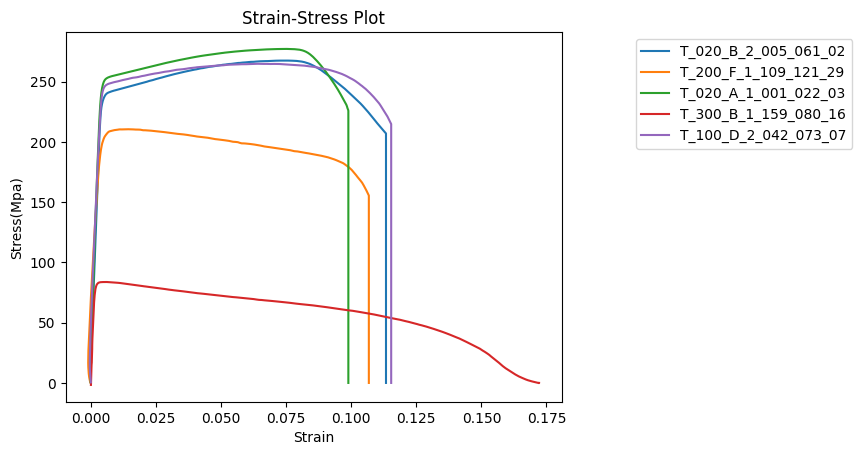

In [58]:
#Strain Stress plot
exampleNames = []
for i in range(0, 5):
  randomnum = random.randint(0, len(csv_paths))
  exapmleStrain = data[randomnum].iloc[ : , 0]
  exapmleStress = data[randomnum].iloc[ : , 1]
  exampleName = file_names[randomnum].split(".")[0]
  exampleNames.append(exampleName)
  plt.plot(exapmleStrain, exapmleStress)


plt.xlabel('Strain')
plt.ylabel('Stress(Mpa)')
plt.legend(exampleNames,  bbox_to_anchor=(0.8, 0.5, 0.8, 0.5))
plt.title('Strain-Stress Plot')
plt.show()